### **Regressão Linear - Métodos dos Minímos Quadrados**

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

### **valores de entrada**

In [2]:
n_casas_decimais = 8

x = [68, 66, 68, 65, 69, 66, 68, 65, 71, 67, 68, 70]
y = [65, 63, 67, 64, 68, 62, 70, 66, 68, 67, 69, 71]

tabela = pd.DataFrame({
    'X': x,
    'Y': y
})

tabela.index += 1
tabela

,X,Y
1,68,65
2,66,63
3,68,67
4,65,64
5,69,68
6,66,62
7,68,70
8,65,66
9,71,68
10,67,67


### **correlação de Pearson**

In [3]:
r = tabela['X'].corr(tabela['Y'])
coef_det = r ** 2

print(f'coeficiente de correlação de Pearson = {r:.{n_casas_decimais}f}')
print(f'coefeciente de determinação = {coef_det*100:.2f}%')

coeficiente de correlação de Pearson = 0.70265165
coefeciente de determinação = 49.37%


### **Sistema de equações**

In [4]:
n, _ = tabela.shape

soma_x = tabela['X'].sum()
soma_y = tabela['Y'].sum()

soma_xy = (tabela['X'] * tabela['Y']).sum()
soma_x2 = (tabela['X'] ** 2).sum()
soma_y2 = (tabela['Y'] ** 2).sum()

a, b, x, y = sp.symbols("a b x y")

display(sp.Eq(a*n + b*soma_x, soma_y ))
display(sp.Eq(a*soma_x + b*soma_x2, soma_xy))

Eq(12*a + 811*b, 800)

Eq(811*a + 54849*b, 54107)

### **Equação da reta**

In [5]:
b = round(((n * soma_xy - soma_x*soma_y) / (n * soma_x2 - soma_x**2) ), n_casas_decimais)
a = round((soma_y - soma_x*b) / n, n_casas_decimais)

equacao_reta = sp.Eq(y, a + b*x)

def f(x):
  return a + b*x

equacao_reta

Eq(y, 1.03640257*x - 3.37687369)

### **inferência**

In [10]:
rng = np.random.default_rng()
vls = rng.permuted(np.arange(tabela['X'].min(), tabela['X'].max(), 0.5))[:10]
vls.sort()

tabela_inf = pd.DataFrame({
    'X': vls,
    'Y': f(vls)
})

display(tabela_inf)
#Ou um valor especifico
display(f(66.6))

,X,Y
0,65.5,64.507495
1,66.0,65.025696
2,66.5,65.543897
3,67.5,66.580300
4,68.0,67.098501
5,68.5,67.616702
6,69.0,68.134904
7,69.5,68.653105
8,70.0,69.171306
9,70.5,69.689507


65.647537472

### **gráfico**

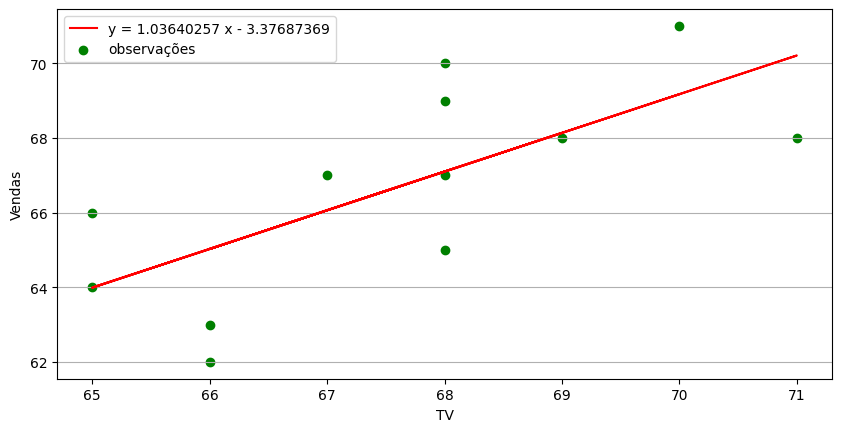

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(10)

ax.plot(tabela['X'], f(tabela['X']), 'r', label= sp.latex(equacao_reta));
ax.scatter(tabela['X'], tabela['Y'], c='green' ,label= 'observações')

ax.set_xlabel('TV')
ax.set_ylabel('Vendas')

ax.legend();

ax.grid(axis='y')